<a href="https://colab.research.google.com/github/satria-mitra/CASA0018-Cloud-Classification/blob/main/Projects/Final_Project/CASA0018_cloud_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Instruction**

This project, Cloud classification, is part of CASA0018 Deep Learning project. The dataset is available to download from the link below. However, some images are taken by myself or from publis image repository such as Flickr. Follow the steps on this tutorial to see the result. One may have different result since the datasets are not identic.


1.   Download Cirrus Cumulus Stratus Nimbus (CCSN) Database
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/CADDPD&version=2.0

2.   Download Howard-Cloud-X
https://www.kaggle.com/datasets/imbikramsaha/howard-cloudx/code

### **Data Cleaning**
#### Manual checking the image

While CCSN datasets has 10 cloud types + 1 contrail, Howard-Cloud-X only has 10 cloud types without contrail.

First, lets see how many pictures for each type of cloud from the two datasets

In [2]:
import cv2 #opencv
import os
import time
import uuid

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
CCSN_path = '/content/drive/MyDrive/Kuliah/UCL/Projects/CASA0018-Cloud-Classification/Projects/Final_Project/Datasets/CCSN_v2' #Directories of Google Drive

os.chdir(CCSN_path) #Go to path
os.listdir(CCSN_path) #List out files in the path
print("Files and directories in '", CCSN_path, "' :", os.listdir(CCSN_path))

Files and directories in ' /content/drive/MyDrive/Kuliah/UCL/Projects/CASA0018-Cloud-Classification/Projects/Final_Project/Datasets/CCSN_v2 ' : ['Sc', 'Ns', 'Ci', 'Cu', 'Cs', 'Ct', 'St', 'As', 'Cc', 'Ac', 'Cb']


In [5]:
Howard_path = '/content/drive/MyDrive/Kuliah/UCL/Projects/CASA0018-Cloud-Classification/Projects/Final_Project/Datasets/Howard-Cloud-X' #Directories of Google Drive
os.chdir(Howard_path) #Go to path
os.listdir(Howard_path) #List out files in the path
print("Files and directories in '", Howard_path, "' :", os.listdir(Howard_path))

Files and directories in ' /content/drive/MyDrive/Kuliah/UCL/Projects/CASA0018-Cloud-Classification/Projects/Final_Project/Datasets/Howard-Cloud-X ' : ['Ac', 'As', 'Cc', 'Cs', 'Ci', 'Cb', 'Cu', 'Ns', 'Sc', 'St']


In [76]:
CCSN_dir = os.listdir(CCSN_path)
for dir_name in CCSN_dir:
    # Create the full path to the directory
    dir_path = os.path.join(CCSN_path, dir_name)

    # Get a list of files in the directory
    files = os.listdir(dir_path)

    # Count the number of files
    num_files = len(files)

    # Print the directory name and the number of files it contains
    print(f"{dir_name}: {num_files} files")

Sc: 208 files
Ns: 162 files
Ci: 74 files
Cu: 109 files
Cs: 58 files
Ct: 155 files
St: 257 files
As: 65 files
Cc: 105 files
Ac: 118 files
Cb: 193 files


In [77]:
Howard_dir = os.listdir(Howard_path)
for dir_name in Howard_dir:
    # Create the full path to the directory
    dir_path = os.path.join(Howard_path, dir_name)

    # Get a list of files in the directory
    files = os.listdir(dir_path)

    # Count the number of files
    num_files = len(files)

    # Print the directory name and the number of files it contains
    print(f"{dir_name}: {num_files} files")

Ac: 136 files
As: 187 files
Cc: 131 files
Cs: 129 files
Ci: 120 files
Cb: 124 files
Cu: 188 files
Ns: 131 files
Sc: 132 files
St: 137 files


#### Combine files from both datasets

In [78]:
import shutil

combined_path = '/content/combined_datasets_new'
for dir_name in os.listdir(CCSN_path):
    combined_subdir = os.path.join(combined_path, dir_name)
    if not os.path.exists(combined_subdir):
        os.makedirs(combined_subdir)

# Function to copy files from source to destination
def copy_files(source_path):
    for dir_name in os.listdir(source_path):
        source_dir_path = os.path.join(source_path, dir_name)
        destination_dir_path = os.path.join(combined_path, dir_name)

        if not os.path.exists(destination_dir_path):
            os.makedirs(destination_dir_path)


        for file_name in os.listdir(source_dir_path):
            src_file_path = os.path.join(source_dir_path, file_name)
            dst_file_path = os.path.join(destination_dir_path, file_name)

            file_counter = 1
            while os.path.exists(dst_file_path):
                name, ext = os.path.splitext(file_name)
                new_name = f"{name}_{file_counter}{ext}"
                dst_file_path = os.path.join(destination_dir_path, new_name)
                file_counter += 1

            # Copy the file to the destination directory
            shutil.copy(src_file_path, dst_file_path)

copy_files(CCSN_path)
copy_files(Howard_path)


#### Recheck how many files there are in each cloud types

In [90]:
combined_path = '/content/combined_datasets'
combined_dir = os.listdir(combined_path)

for dir_name in combined_dir:
    # Create the full path to the directory
    dir_path = os.path.join(combined_path, dir_name)

    # Get a list of files in the directory
    files = os.listdir(dir_path)

    # Count the number of files
    num_files = len(files)

    # Print the directory name and the number of files it contains
    print(f"{dir_name}: {num_files} files")

Ci: 194 files
Ns: 293 files
Sc: 340 files
Cu: 297 files
Cc: 236 files
Ac: 254 files
As: 252 files
St: 394 files
Cb: 317 files
Cs: 187 files
Ct: 155 files


#### **Ohh noo**
Looks like our dataset is imbalance, and some cloud even has less than 200 pictures. Let's add more dataset.

This is how you can add more dataset:
1. Download one by one image from Google or Flickr.

**or**


2. Bulk download using some Python scripts.
I opt for this option because I'm a ~lazy~ clever person (sorry Duncan)

I found the way [how to bulk download images from Flickr](https://www.youtube.com/watch?v=9sBQqlTtQ2k) on Youtube. Credits goes to [Jeff Heaton](https://www.heatonresearch.com/) for his amazing [pyimgdata](https://github.com/jeffheaton/pyimgdata) script to download image from Flickr.
What really surprising is this python code still working eventhough it is already 4 years old!.

Now lets run the code

#### **Run pyimgdata scripts**

1. First, you need to [register](https://www.flickr.com/services/apps/create/apply) for Flickr API, then you will obtain your `key`and `secret`.
2. download [pyimgdata](https://github.com/jeffheaton/pyimgdata) from Github.
3. Open `config_flickr.ini` file and insert your `key`and `secret`. Also edit other variables for your desire projects.
4. Import flickr API and Pillow packages


In [28]:
pip install flickrapi

In [38]:
from PIL import Image

5. Run the `flickr-download.py` on your machine. For my case, I will run 11 times since I want to add more datasets for 11 cloud types

In [59]:
import os
os.chdir('/content')
!python flickr-download.py

2024-04-24 10:07:51,811 - root - INFO : Line 166 - Starting...
/content/flickr-download.py:131: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  Image.ANTIALIAS)
2024-04-24 10:08:14,386 - root - INFO : Line 158 - Writing sources file.
2024-04-24 10:08:14,387 - root - INFO : Line 192 - Complete, elapsed time: 0:00:22.58


In [91]:
flickr_path = '/content/flickr_datasets'
flickr_dir = os.listdir(flickr_path)

for dir_name in flickr_dir:
    # Create the full path to the directory
    dir_path = os.path.join(flickr_path, dir_name)

    # Get a list of files in the directory
    files = os.listdir(dir_path)

    # Count the number of files
    num_files = len(files)

    # Print the directory name and the number of files it contains
    print(f"{dir_name}: {num_files} files")

Ci: 352 files
Ns: 352 files
Sc: 352 files
Cu: 352 files
Cc: 365 files
Ac: 379 files
As: 361 files
St: 74 files
.ipynb_checkpoints: 0 files
Cb: 352 files
Cs: 332 files
Ct: 352 files


## **Image Processing**
#### Check images from flickr datasets and combined datasets

Ac image:  (750, 1000, 3)
Ac_1 image:  (256, 256, 3)


<Figure size 640x480 with 0 Axes>

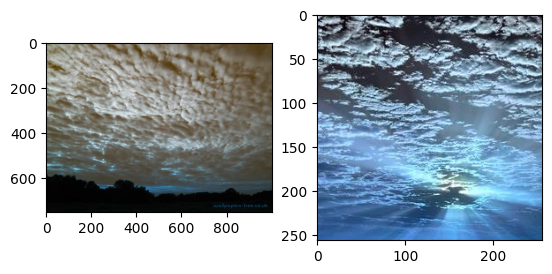

In [102]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

os.chdir('/content')

plt.figure()
f, axarr = plt.subplots(1,2)

## Check Cloud Images from Combined datasets##
img_ac = cv2.imread("/content/combined_datasets/Ac/04659e43-bb53-49bc-a53c-b1b089a65a71.jpg")
print("Ac image: ", img_ac.shape)
axarr[0].imshow(img_ac)

## Check Cloud Images from Combined datasets##
img_ac_1 = cv2.imread("/content/flickr_datasets/Ac/Altocumulus-019e85ea2430a9610d53cdf15465e25fab84d5dbe3e3083374ef268b827d229a.jpg")
print("Ac_1 image: ", img_ac_1.shape)
axarr[1].imshow(img_ac_1)

Note that picture from combined datasets has a large size compared to datasets from flickr. We have to resize them

#### Using Pillow package to resize and crop cloud type

In [104]:
import os
from PIL import Image

def resize_and_save(source_directory, target_directory, target_size=(256, 256)):
    for root, dirs, files in os.walk(source_directory):

        rel_path = os.path.relpath(root, source_directory)
        dest_dir = os.path.join(target_directory, rel_path)
        if not os.path.exists(dest_dir):
            os.makedirs(dest_dir)

        # Resize each image and save it to the new directory
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                src_file_path = os.path.join(root, file)
                img = Image.open(src_file_path)
                img = img.resize(target_size, Image.ANTIALIAS)
                dest_file_path = os.path.join(dest_dir, file)
                img.save(dest_file_path)
                print(f"Resized and saved {file} to {dest_file_path}")

# Paths to the source and destination directories
source_directory = '/content/combined_datasets'
target_directory = '/content/combined_datasets_resized'

# Resize all images and save to new directory
resize_and_save(source_directory, target_directory)


<ipython-input-104-0ba60eb6acd8>:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


Resized and saved 9655053f-9704-47a8-bbc2-5cfbf939260b.jpg to /content/combined_datasets_resized/Ci/9655053f-9704-47a8-bbc2-5cfbf939260b.jpg
Resized and saved Ci-N138.jpg to /content/combined_datasets_resized/Ci/Ci-N138.jpg
Resized and saved e85bebdd-5ad8-4a7d-b45c-7e60aa142d20.jpg to /content/combined_datasets_resized/Ci/e85bebdd-5ad8-4a7d-b45c-7e60aa142d20.jpg
Resized and saved d2a9f0c8-dc3b-4047-aa64-e8f797e5aca4.jpg to /content/combined_datasets_resized/Ci/d2a9f0c8-dc3b-4047-aa64-e8f797e5aca4.jpg
Resized and saved Ci-N062.jpg to /content/combined_datasets_resized/Ci/Ci-N062.jpg
Resized and saved Ci-N024.jpg to /content/combined_datasets_resized/Ci/Ci-N024.jpg
Resized and saved 2a0acb44-69cb-4501-9a10-f755a7697215.jpg to /content/combined_datasets_resized/Ci/2a0acb44-69cb-4501-9a10-f755a7697215.jpg
Resized and saved cd7e28cc-34c8-451b-9a69-884b33bf3ee4.jpg to /content/combined_datasets_resized/Ci/cd7e28cc-34c8-451b-9a69-884b33bf3ee4.jpg
Resized and saved eec88cb1-70de-4b9c-af81-e1df

#### Recheck again the size of the image

Ac image:  (256, 256, 3)
Ac_1 image:  (256, 256, 3)
Ac image:  (256, 256, 3)
Ac_1 image:  (256, 256, 3)


<Figure size 640x480 with 0 Axes>

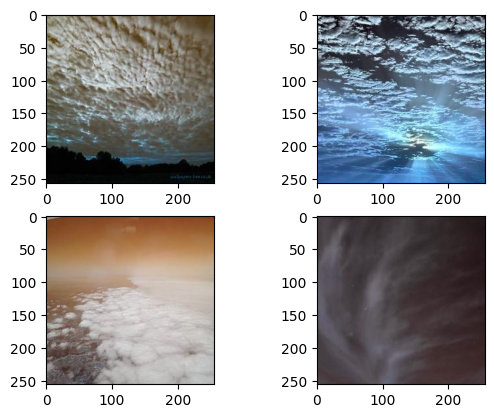

In [109]:
plt.figure()
f, axarr = plt.subplots(2,2)

## ReCheck Cloud Images from Combined datasets##
img_ac = cv2.imread("/content/combined_datasets_resized/Ac/04659e43-bb53-49bc-a53c-b1b089a65a71.jpg")
print("Ac image: ", img_ac.shape)
axarr[0][0].imshow(img_ac)

## reCheck Cloud Images from flickr datasets##
img_ac_1 = cv2.imread("/content/flickr_datasets/Ac/Altocumulus-019e85ea2430a9610d53cdf15465e25fab84d5dbe3e3083374ef268b827d229a.jpg")
print("Ac_1 image: ", img_ac_1.shape)
axarr[0][1].imshow(img_ac_1)

## another image from combined datasets##
img_ci = cv2.imread("/content/combined_datasets_resized/Ci/01220188-62c0-45bd-b46e-061f62ca5c44.jpg")
print("Ac image: ", img_ci.shape)
axarr[1][0].imshow(img_ci)

## reCheck Cloud Images from flickr datasets##
img_ci_1 = cv2.imread("/content/flickr_datasets/Ci/cirrus-00e633ba4dcdc12e1920b256a6a0e72fc86100369ba5fa244a5a204ad3ef0a7e.jpg")
print("Ac_1 image: ", img_ci_1.shape)
axarr[1][1].imshow(img_ci_1)

Now we have identical image size for both datasets

Back it up to google drive

In [114]:
# Path to the directory you want to copy
flickr_directory = '/content/flickr_datasets'

# Path in your Google Drive where you want to store the data
flickr_destination_directory = '/content/drive/MyDrive/Kuliah/UCL/Projects/CASA0018-Cloud-Classification/Projects/Final_Project/Datasets/flickr_datasets'

# Copy the entire directory to Google Drive
!cp -r {flickr_directory} {flickr_destination_directory}

print("Files have been copied to your Google Drive.")

Files have been copied to your Google Drive.


In [115]:
# Path to the directory you want to copy
combined_directory = '/content/combined_datasets_resized'

# Path in your Google Drive where you want to store the data
combined_destination_directory = '/content/drive/MyDrive/Kuliah/UCL/Projects/CASA0018-Cloud-Classification/Projects/Final_Project/Datasets/combined_datasets_resized'

# Copy the entire directory to Google Drive
!cp -r {combined_directory} {combined_destination_directory}

print("Files have been copied to your Google Drive.")

Files have been copied to your Google Drive.


#### Recombined them to make it easier for Data Processing

In [116]:
import shutil

final_path = '/content/final_datasets'
for dir_name in os.listdir(flickr_directory):
    final_subdir = os.path.join(final_path, dir_name)
    if not os.path.exists(final_subdir):
        os.makedirs(final_subdir)

# Function to copy files from source to destination
def copy_files(source_path):
    for dir_name in os.listdir(source_path):
        source_dir_path = os.path.join(source_path, dir_name)
        destination_dir_path = os.path.join(final_path, dir_name)

        if not os.path.exists(destination_dir_path):
            os.makedirs(destination_dir_path)


        for file_name in os.listdir(source_dir_path):
            src_file_path = os.path.join(source_dir_path, file_name)
            dst_file_path = os.path.join(destination_dir_path, file_name)

            file_counter = 1
            while os.path.exists(dst_file_path):
                name, ext = os.path.splitext(file_name)
                new_name = f"{name}_{file_counter}{ext}"
                dst_file_path = os.path.join(destination_dir_path, new_name)
                file_counter += 1

            # Copy the file to the destination directory
            shutil.copy(src_file_path, dst_file_path)

copy_files(flickr_directory)
copy_files(combined_directory)


#### Count how many files there are

In [118]:
flickr_path = '/content/flickr_datasets'
flickr_dir = os.listdir(flickr_path)

for dir_name in flickr_dir:
    # Create the full path to the directory
    dir_path = os.path.join(flickr_path, dir_name)

    # Get a list of files in the directory
    files = os.listdir(dir_path)

    # Count the number of files
    num_files = len(files)

    # Print the directory name and the number of files it contains
    print(f"{dir_name}: {num_files} files")

Ci: 352 files
Ns: 352 files
Sc: 352 files
Cu: 352 files
Cc: 365 files
Ac: 379 files
As: 361 files
St: 74 files
.ipynb_checkpoints: 0 files
Cb: 352 files
Cs: 332 files
Ct: 352 files


In [122]:
combined_path = '/content/combined_datasets_resized'
combined_dir = os.listdir(combined_path)

for dira_name in flickr_dir:
    # Create the full path to the directory
    dira_path = os.path.join(combined_path, dira_name)

    # Get a list of files in the directory
    files = os.listdir(dira_path)

    # Count the number of files
    num_files = len(files)

    # Print the directory name and the number of files it contains
    print(f"{dira_name}: {num_files} files")

Ci: 194 files
Ns: 293 files
Sc: 340 files
Cu: 297 files
Cc: 236 files
Ac: 253 files
As: 252 files
St: 394 files


FileNotFoundError: [Errno 2] No such file or directory: '/content/combined_datasets_resized/.ipynb_checkpoints'

In [125]:
final_dir = os.listdir(final_path)

for dir_name in final_dir:
    # Create the full path to the directory
    dir_path = os.path.join(final_path, dir_name)

    # Get a list of files in the directory
    files = os.listdir(dir_path)

    # Count the number of files
    num_files = len(files)

    # Print the directory name and the number of files it contains
    print(f"{dir_name}: {num_files} files")

    print("#Categories: ", len(os.listdir(final_path)))


Ci: 546 files
#Categories:  12
Ns: 645 files
#Categories:  12
Sc: 692 files
#Categories:  12
Cu: 649 files
#Categories:  12
Cc: 601 files
#Categories:  12
Ac: 632 files
#Categories:  12
As: 613 files
#Categories:  12
St: 468 files
#Categories:  12
.ipynb_checkpoints: 0 files
#Categories:  12
Cb: 669 files
#Categories:  12
Cs: 518 files
#Categories:  12
Ct: 507 files
#Categories:  12


In [97]:
import os #for creating path names and manipulating directories/files in an operating system
import random
import tensorflow as tf

In [ ]:
import os #for creating path names and manipulating directories/files in an operating system
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from PIL import Image
import PIL
import numpy as np
import cv2
import matplotlib.pyplot as plt
import datetime #for tensorboard and logging

print(tf.__version__)

2.15.0


### Connect to Data Directory in Google Drive

##### CCSN Datasets

##### Howard Datasets